# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [104]:
###LIMPIEZA DE DATOS 

import pandas as pd
#primero llamamos a la base de datos
import os #Exportamos este módulo para trabajar con carpetas
#reemplazamos la ruta con el directorio.
os.chdir("/Users/justinareinke/Downloads/TP2")
print(os.getcwd()) 

!pip install openpyxl
# Abrimos el archivo y vemos las primeras tres filas
df = pd.read_csv("Base Airbnb NY.csv")
df.head(3)

#####INCISO 1: Tengan en cuenta si hay valores duplicados y eliminénlos.

# Verificar si hay duplicados basandonos en 'host_id'
duplicados_host = df.duplicated(subset=['id'])
print(f"Cantidad de filas duplicadas basadas en 'id': {duplicados_host.sum()}")
#encontramos 10 datos duplicados 

# Eliminar los duplicados y mantener solo la primera aparición
df_sin_duplicados = df.drop_duplicates(subset=['id'], keep='first')

# Mostrar las primeras filas del dataframe sin duplicados
print(df_sin_duplicados.head())

# Guardamos el dataframe sin duplicados en un nuevo archivo CSV
df_sin_duplicados.to_csv("Base_Airbnb_NY_sin_duplicados.csv", index=False)

print("Duplicados eliminados y archivo guardado con éxito.")

######INCISO 2: Eliminen las columnas que no tienen información de interés.

# Eliminar las columnas 'host_name', 'neighbourhood', 'last_review' 
#Eliminamos columnas que pensamos que agregaban no aportaban información adicional. También 
#nos fijamos en las columnas que nos pedían para resolver los proximos ejercicios. 
df_nuevo = df_sin_duplicados.drop(columns=['host_name', 'neighbourhood', 'last_review']).copy()

# Ver las primeras filas del nuevo dataframe sin las columnas eliminadas
print(df_nuevo.head())

# Guardamos el nuevo dataframe sin modificar el original
df_nuevo.to_csv("Base_Airbnb_NY_sin_columnas.csv", index=False)


/Users/justinareinke/Downloads/TP2
Cantidad de filas duplicadas basadas en 'id': 10
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_rev

In [108]:
######INCISO 3
#Luego de leer el artículo decidan qué hacer con los missing values e implementen su decision.
#Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan)
#para explicar los problemas que pueden surgir por su estrategia elegida.

#borrar las filas con NA o imputar con la mediana 
#decidimos imputar con la mediana
#en el caso de reviews per month, fill.na con 0

#imputamos los datos para todas las variables a pesar de que en algunas columnas no habían datos faltantes y este
#proceso no era necesario. Pero para evitar Na ejecutamos este codigo en todas las columnas

df_nuevo
# Reemplazar los valores faltantes (NaN) en la columna 'reviews_per_month' por 0
df_nuevo['reviews_per_month'] = df_nuevo['reviews_per_month'].fillna(0)

# Verificar que ya no haya valores faltantes en la columna
print(df_nuevo['reviews_per_month'].isnull().sum())  # Esto debería mostrar 0 si ya no hay valores faltantes

# Visualizar las primeras filas de la columna para confirmar
print(df_nuevo[['reviews_per_month']].head())

df_nuevo

0
   reviews_per_month
0               0.21
1               0.38
2               0.00
3               4.64
4               0.10


,id,name,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,40.75751,-73.99112,Shared room,55.0,1,0,0.00,6,2


In [110]:
#sacar los datos faltantes de precio
# Calcular la mediana de la columna 'price'
mediana_price = df_nuevo['price'].median()

# Reemplazar los valores faltantes (NaN) en la columna 'price' con la mediana
df_nuevo['price'] = df_nuevo['price'].fillna(mediana_price)

# Verificar que ya no haya valores faltantes en la columna 'price'
print(df_nuevo['price'].isnull().sum())  # Esto debería mostrar 0 si ya no hay valores faltantes

# Visualizar las primeras filas de la columna para confirmar
print(df_nuevo[['price']].head())

0
   price
0  149.0
1  225.0
2  150.0
3   89.0
4   80.0


In [112]:
#datos faltantes para latitude 
# Calcular la mediana de la columna 'latitude'
mediana_latitude = df_nuevo['latitude'].median()

# Reemplazar los valores faltantes (NaN) en la columna 'latitude' con la mediana
df_nuevo['latitude'] = df_nuevo['latitude'].fillna(mediana_latitude)

# Verificar que ya no haya valores faltantes en la columna 'latitude'
print(df_nuevo['latitude'].isnull().sum())  # Esto debería mostrar 0 si ya no hay valores faltantes

# Visualizar las primeras filas de la columna para confirmar
print(df_nuevo[['latitude']].head())

0
   latitude
0  40.64749
1  40.75362
2  40.80902
3  40.68514
4  40.79851


In [114]:
# Calcular la mediana de la columna 'longitude'
mediana_longitude = df_nuevo['longitude'].median()

# Reemplazar los valores faltantes (NaN) en la columna 'longitude' con la mediana
df_nuevo['longitude'] = df_nuevo['longitude'].fillna(mediana_longitude)

# Verificar que ya no haya valores faltantes en la columna 'longitude'
print(df_nuevo['longitude'].isnull().sum())  # Esto debería mostrar 0 si ya no hay valores faltantes

# Visualizar las primeras filas de la columna para confirmar
print(df_nuevo[['longitude']].head())

0
   longitude
0  -73.97237
1  -73.98377
2  -73.94190
3  -73.95976
4  -73.94399


In [116]:
# Calcular la mediana de la columna 'minimum_nights'
mediana_minimum_nights = df_nuevo['minimum_nights'].median()

# Reemplazar los valores faltantes (NaN) en la columna 'minimum_nights' con la mediana
df_nuevo['minimum_nights'] = df_nuevo['minimum_nights'].fillna(mediana_minimum_nights)

# Verificar que ya no haya valores faltantes en la columna 'minimum_nights'
print(df_nuevo['minimum_nights'].isnull().sum())  # Esto debería mostrar 0 si ya no hay valores faltantes

# Visualizar las primeras filas de la columna para confirmar
print(df_nuevo[['minimum_nights']].head())

0
   minimum_nights
0               1
1               1
2               3
3               1
4              10


In [118]:
# Calcular la mediana de la columna 'calculated_host_listings_count'
mediana_calculated_host_listings_count = df_nuevo['calculated_host_listings_count'].median()

# Reemplazar los valores faltantes (NaN) en la columna 'calculated_host_listings_count' con la mediana
df_nuevo['calculated_host_listings_count'] = df_nuevo['calculated_host_listings_count'].fillna(mediana_calculated_host_listings_count)

# Verificar que ya no haya valores faltantes en la columna 'calculated_host_listings_count'
print(df_nuevo['calculated_host_listings_count'].isnull().sum())  # Esto debería mostrar 0 si ya no hay valores faltantes

# Visualizar las primeras filas de la columna para confirmar
print(df_nuevo[['calculated_host_listings_count']].head())

0
   calculated_host_listings_count
0                               6
1                               2
2                               1
3                               1
4                               1


In [120]:
# Calcular la mediana de la columna 'availability_365'
mediana_availability_365 = df_nuevo['availability_365'].median()

# Reemplazar los valores faltantes (NaN) en la columna 'availability_365' con la mediana
df_nuevo['availability_365'] = df_nuevo['availability_365'].fillna(mediana_availability_365)

# Verificar que ya no haya valores faltantes en la columna 'availability_365'
print(df_nuevo['availability_365'].isnull().sum())  # Esto debería mostrar 0 si ya no hay valores faltantes

# Visualizar las primeras filas de la columna para confirmar
print(df_nuevo[['availability_365']].head())

0
   availability_365
0               365
1               355
2               365
3               194
4                 0


In [126]:
# Calcular la moda de la columna 'neighbourhood_group'
#aca optamos por la moda, no la mediana. 
moda_neighbourhood_group = df_nuevo['neighbourhood_group'].mode()[0]

# Reemplazar los valores faltantes (NaN) en la columna 'neighbourhood_group' con la moda
df_nuevo['neighbourhood_group'] = df_nuevo['neighbourhood_group'].fillna(moda_neighbourhood_group)

# Verificar que ya no haya valores faltantes en la columna 'neighbourhood_group'
print(df_nuevo['neighbourhood_group'].isnull().sum())  # Esto debería mostrar 0 si ya no hay valores faltantes

# Visualizar las primeras filas de la columna para confirmar
print(df_nuevo[['neighbourhood_group']].head())

0
  neighbourhood_group
0            Brooklyn
1           Manhattan
2           Manhattan
3            Brooklyn
4           Manhattan


In [128]:
# Reemplazar los valores faltantes (NaN) en la columna 'number_of_reviews' con 0

df_nuevo['number_of_reviews'] = df_nuevo['number_of_reviews'].fillna(0)

# Verificar que ya no haya valores faltantes en la columna 'number_of_reviews'
print(df_nuevo['number_of_reviews'].isnull().sum())  # Esto debería mostrar 0 si ya no hay valores faltantes

# Visualizar las primeras filas de la columna para confirmar
print(df_nuevo[['number_of_reviews']].head())

0
   number_of_reviews
0                  9
1                 45
2                  0
3                270
4                  9


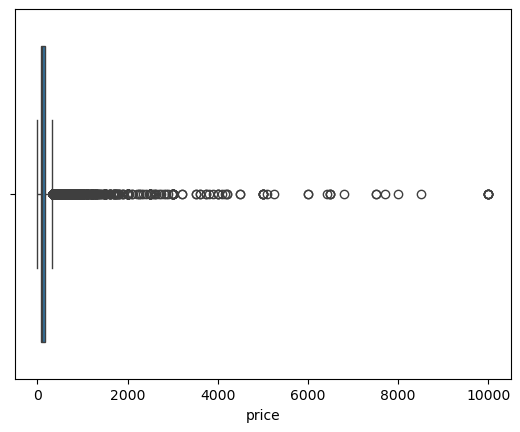

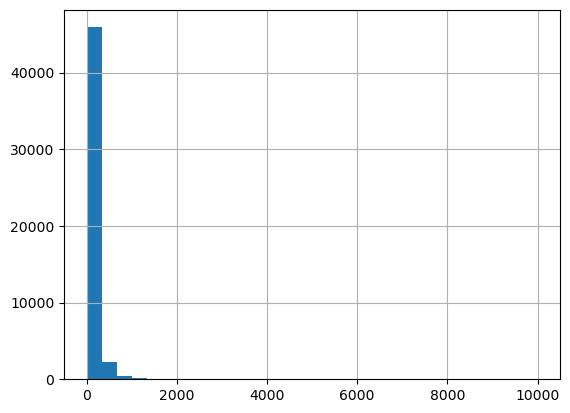

In [130]:
#####INCISO 4: Si hay observaciones con outliers o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
#para ver si hay outliers o valores atipicos vamos a optar por herramientas de visualización 

#optamos por visualizar la distribución de las variables para decidir si transformarla con logartimo antes de eliminar outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para visualizar outliers
sns.boxplot(x=df_nuevo['price'])
plt.show()

# Histograma para ver la distribución de los datos
df_nuevo['price'].hist(bins=30)
plt.show()

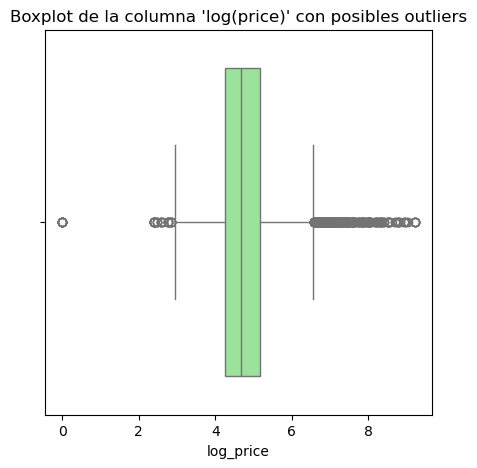

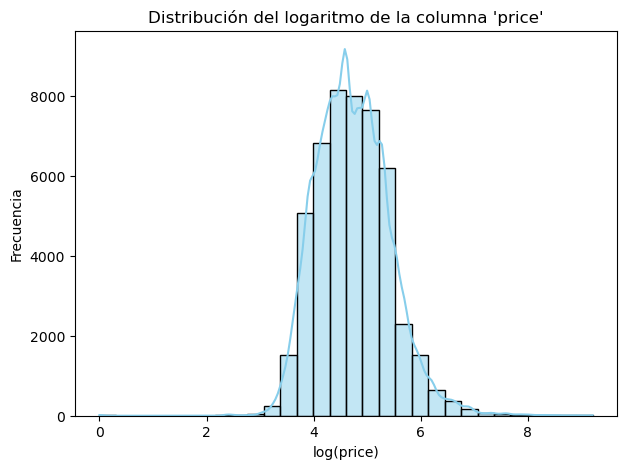

Número de outliers en la columna 'log(price)': 637
        log_price
count  637.000000
mean     6.720961
std      1.491961
min      0.000000
25%      6.684612
50%      6.903747
75%      7.313887
max      9.210440


In [132]:
#boxplot con outliers  PRICE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la columna 'price'
columna = 'price'

# Transformar la columna 'price' usando el logaritmo natural
df_nuevo['log_price'] = np.log(df_nuevo[columna] + 1)  # Sumar 1 para evitar problemas con valores cero

# Calcular los cuartiles y el IQR para la columna transformada 'log_price'
Q1 = df_nuevo['log_price'].quantile(0.25)
Q3 = df_nuevo['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Seleccionar los outliers en la columna transformada
outliers_log_price = df_nuevo[(df_nuevo['log_price'] < limite_inferior) | (df_nuevo['log_price'] > limite_superior)]

# Contar y mostrar un resumen de los outliers detectados
num_outliers = len(outliers_log_price)
outliers_summary = outliers_log_price[['log_price']].describe()

# Visualizar los outliers con un boxplot para 'log_price'
plt.figure(figsize=(5,5))
sns.boxplot(x=df_nuevo['log_price'], color='lightgreen')
plt.title("Boxplot de la columna 'log(price)' con posibles outliers")
plt.show()

# Visualizar la distribución de la columna 'log_price'
plt.figure(figsize=(7,5))
sns.histplot(df_nuevo['log_price'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del logaritmo de la columna 'price'")
plt.xlabel('log(price)')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar el número de outliers y el resumen estadístico de 'log_price'
print(f"Número de outliers en la columna 'log(price)': {num_outliers}")
print(outliers_summary)


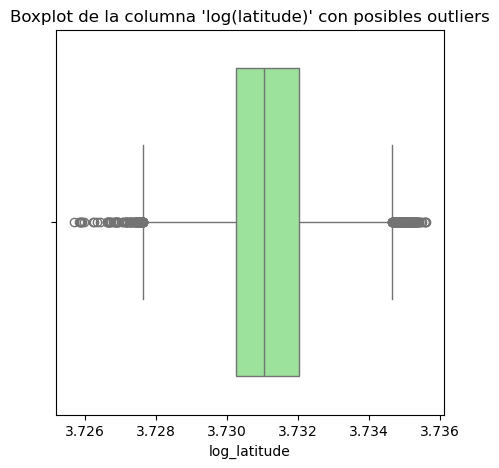

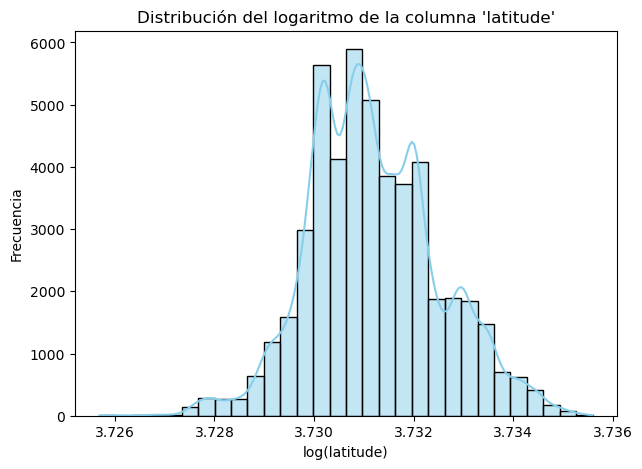

Número de outliers en la columna 'log(latitude)': 420
       log_latitude
count    420.000000
mean       3.731824
std        0.003763
min        3.725688
25%        3.727551
50%        3.734737
75%        3.734931
max        3.735597


In [134]:
#boxplot con outliers  LATITUDE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la columna 'latitude'
columna = 'latitude'

# Transformar la columna 'latitude' usando el logaritmo natural
df_nuevo['log_latitude'] = np.log(df_nuevo[columna] + 1)  # Sumar 1 para evitar problemas con valores cero

# Calcular los cuartiles y el IQR para la columna transformada 'log_latitude'
Q1 = df_nuevo['log_latitude'].quantile(0.25)
Q3 = df_nuevo['log_latitude'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Seleccionar los outliers en la columna transformada
outliers_log_latitude = df_nuevo[(df_nuevo['log_latitude'] < limite_inferior) | (df_nuevo['log_latitude'] > limite_superior)]

# Contar y mostrar un resumen de los outliers detectados
num_outliers = len(outliers_log_latitude)
outliers_summary = outliers_log_latitude[['log_latitude']].describe()

# Visualizar los outliers con un boxplot para 'log_latitude'
plt.figure(figsize=(5,5))
sns.boxplot(x=df_nuevo['log_latitude'], color='lightgreen')
plt.title("Boxplot de la columna 'log(latitude)' con posibles outliers")
plt.show()

# Visualizar la distribución de la columna 'log_latitude'
plt.figure(figsize=(7,5))
sns.histplot(df_nuevo['log_latitude'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del logaritmo de la columna 'latitude'")
plt.xlabel('log(latitude)')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar el número de outliers y el resumen estadístico de 'log_latitude'
print(f"Número de outliers en la columna 'log(latitude)': {num_outliers}")
print(outliers_summary)


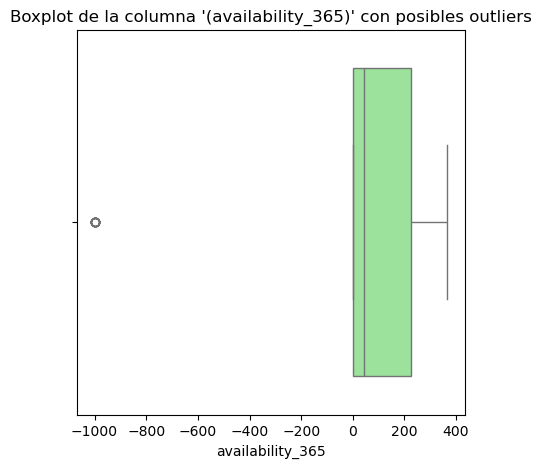

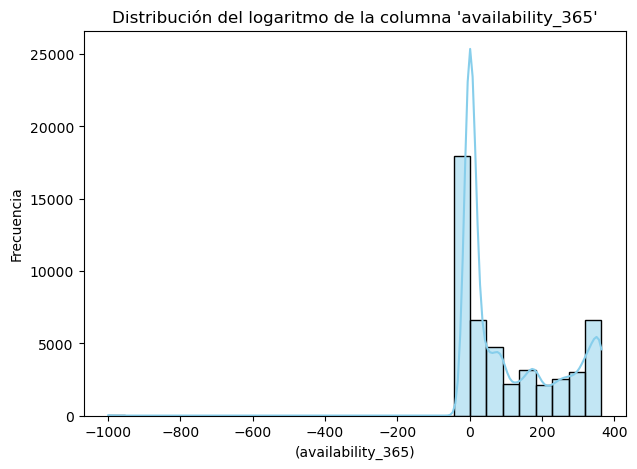

Número de outliers en la columna 'log(availability_365)': 15
       availability_365
count              15.0
mean             -999.0
std                 0.0
min              -999.0
25%              -999.0
50%              -999.0
75%              -999.0
max              -999.0


In [136]:
# Boxplot con outliers para la columna 'availability_365'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular los cuartiles y el IQR para la columna transformada 'log_availability_365'
Q1 = df_nuevo['availability_365'].quantile(0.25)
Q3 = df_nuevo['availability_365'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Seleccionar los outliers en la columna transformada
outliers_availability_365 = df_nuevo[(df_nuevo['availability_365'] < limite_inferior) | (df_nuevo['availability_365'] > limite_superior)]

# Contar y mostrar un resumen de los outliers detectados
num_outliers = len(outliers_availability_365)
outliers_summary = outliers_availability_365[['availability_365']].describe()

# Visualizar los outliers con un boxplot para 'log_availability_365'
plt.figure(figsize=(5,5))
sns.boxplot(x=df_nuevo['availability_365'], color='lightgreen')
plt.title("Boxplot de la columna '(availability_365)' con posibles outliers")
plt.show()

# Visualizar la distribución de la columna 'log_availability_365'
plt.figure(figsize=(7,5))
sns.histplot(df_nuevo['availability_365'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del logaritmo de la columna 'availability_365'")
plt.xlabel('(availability_365)')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar el número de outliers y el resumen estadístico de 'log_availability_365'
print(f"Número de outliers en la columna 'log(availability_365)': {num_outliers}")
print(outliers_summary)


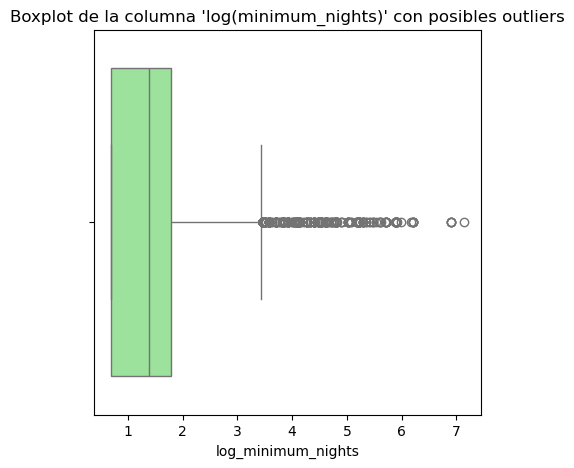

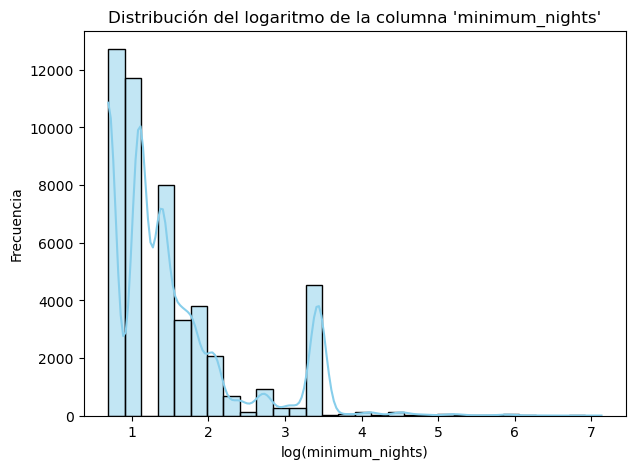

Número de outliers en la columna 'log(minimum_nights)': 747
       log_minimum_nights
count          747.000000
mean             4.266562
std              0.759340
min              3.465736
25%              3.465736
50%              4.110874
75%              4.615121
max              7.131699


In [138]:
# Boxplot con outliers para la columna 'minimum_nights' aplicando logaritmo 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la columna 'minimum_nights'
columna = 'minimum_nights'

# Transformar la columna 'minimum_nights' usando el logaritmo natural
df_nuevo['log_minimum_nights'] = np.log(df_nuevo[columna] + 1)  # Sumar 1 para evitar problemas con valores cero

# Calcular los cuartiles y el IQR para la columna transformada 'log_minimum_nights'
Q1 = df_nuevo['log_minimum_nights'].quantile(0.25)
Q3 = df_nuevo['log_minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Seleccionar los outliers en la columna transformada
outliers_log_minimum_nights = df_nuevo[(df_nuevo['log_minimum_nights'] < limite_inferior) | (df_nuevo['log_minimum_nights'] > limite_superior)]

# Contar y mostrar un resumen de los outliers detectados
num_outliers = len(outliers_log_minimum_nights)
outliers_summary = outliers_log_minimum_nights[['log_minimum_nights']].describe()

# Visualizar los outliers con un boxplot para 'log_minimum_nights'
plt.figure(figsize=(5,5))
sns.boxplot(x=df_nuevo['log_minimum_nights'], color='lightgreen')
plt.title("Boxplot de la columna 'log(minimum_nights)' con posibles outliers")
plt.show()

# Visualizar la distribución de la columna 'log_minimum_nights'
plt.figure(figsize=(7,5))
sns.histplot(df_nuevo['log_minimum_nights'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del logaritmo de la columna 'minimum_nights'")
plt.xlabel('log(minimum_nights)')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar el número de outliers y el resumen estadístico de 'log_minimum_nights'
print(f"Número de outliers en la columna 'log(minimum_nights)': {num_outliers}")
print(outliers_summary)


##Preguntarle a nacho en que caso a que columnas aplicarle lgoaritmo

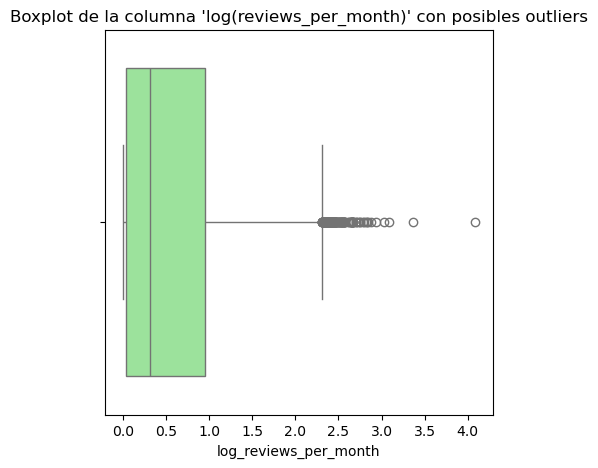

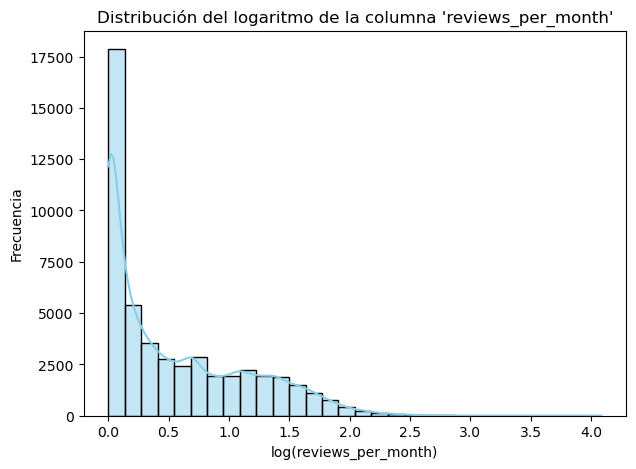

Número de outliers en la columna 'log(reviews_per_month)': 141
       log_reviews_per_month
count             141.000000
mean                2.496360
std                 0.220530
min                 2.311545
25%                 2.362739
50%                 2.425687
75%                 2.564949
max                 4.085976


In [140]:
# Boxplot con outliers para la columna 'reviews_per_month' aplicando logaritmo
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la columna 'reviews_per_month'
columna = 'reviews_per_month'

# Transformar la columna 'reviews_per_month' usando el logaritmo natural
df_nuevo['log_reviews_per_month'] = np.log(df_nuevo[columna] + 1)  # Sumar 1 para evitar problemas con valores cero

# Calcular los cuartiles y el IQR para la columna transformada 'log_reviews_per_month'
Q1 = df_nuevo['log_reviews_per_month'].quantile(0.25)
Q3 = df_nuevo['log_reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Seleccionar los outliers en la columna transformada
outliers_log_reviews_per_month = df_nuevo[(df_nuevo['log_reviews_per_month'] < limite_inferior) | (df_nuevo['log_reviews_per_month'] > limite_superior)]

# Contar y mostrar un resumen de los outliers detectados
num_outliers = len(outliers_log_reviews_per_month)
outliers_summary = outliers_log_reviews_per_month[['log_reviews_per_month']].describe()

# Visualizar los outliers con un boxplot para 'log_reviews_per_month'
plt.figure(figsize=(5,5))
sns.boxplot(x=df_nuevo['log_reviews_per_month'], color='lightgreen')
plt.title("Boxplot de la columna 'log(reviews_per_month)' con posibles outliers")
plt.show()

# Visualizar la distribución de la columna 'log_reviews_per_month'
plt.figure(figsize=(7,5))
sns.histplot(df_nuevo['log_reviews_per_month'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del logaritmo de la columna 'reviews_per_month'")
plt.xlabel('log(reviews_per_month)')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar el número de outliers y el resumen estadístico de 'log_reviews_per_month'
print(f"Número de outliers en la columna 'log(reviews_per_month)': {num_outliers}")
print(outliers_summary)


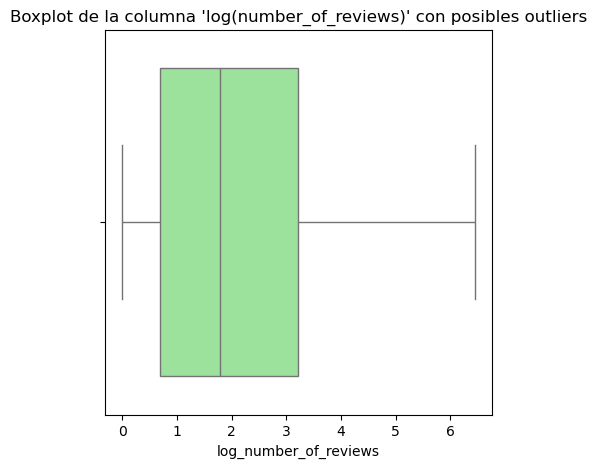

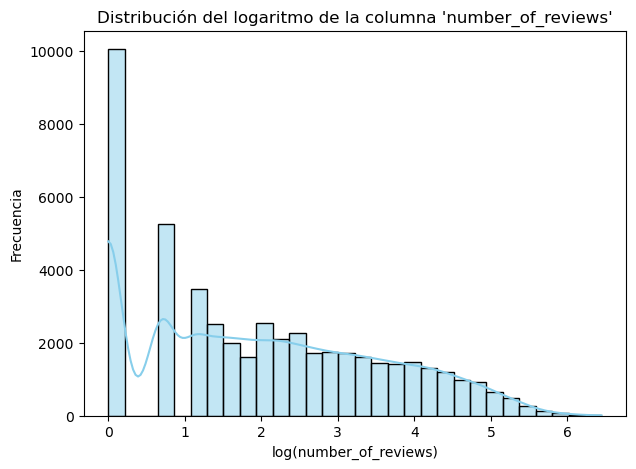

Número de outliers en la columna 'log(number_of_reviews)': 0
       log_number_of_reviews
count                    0.0
mean                     NaN
std                      NaN
min                      NaN
25%                      NaN
50%                      NaN
75%                      NaN
max                      NaN


In [142]:
# Boxplot con outliers para la columna 'number_of_reviews' aplicando logaritmo
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la columna 'number_of_reviews'
columna = 'number_of_reviews'

# Transformar la columna 'number_of_reviews' usando el logaritmo natural
df_nuevo['log_number_of_reviews'] = np.log(df_nuevo[columna] + 1)  # Sumar 1 para evitar problemas con valores cero

# Calcular los cuartiles y el IQR para la columna transformada 'log_number_of_reviews'
Q1 = df_nuevo['log_number_of_reviews'].quantile(0.25)
Q3 = df_nuevo['log_number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Seleccionar los outliers en la columna transformada
outliers_log_number_of_reviews = df_nuevo[(df_nuevo['log_number_of_reviews'] < limite_inferior) | (df_nuevo['log_number_of_reviews'] > limite_superior)]

# Contar y mostrar un resumen de los outliers detectados
num_outliers = len(outliers_log_number_of_reviews)
outliers_summary = outliers_log_number_of_reviews[['log_number_of_reviews']].describe()

# Visualizar los outliers con un boxplot para 'log_number_of_reviews'
plt.figure(figsize=(5,5))
sns.boxplot(x=df_nuevo['log_number_of_reviews'], color='lightgreen')
plt.title("Boxplot de la columna 'log(number_of_reviews)' con posibles outliers")
plt.show()

# Visualizar la distribución de la columna 'log_number_of_reviews'
plt.figure(figsize=(7,5))
sns.histplot(df_nuevo['log_number_of_reviews'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del logaritmo de la columna 'number_of_reviews'")
plt.xlabel('log(number_of_reviews)')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar el número de outliers y el resumen estadístico de 'log_number_of_reviews'
print(f"Número de outliers en la columna 'log(number_of_reviews)': {num_outliers}")
print(outliers_summary)


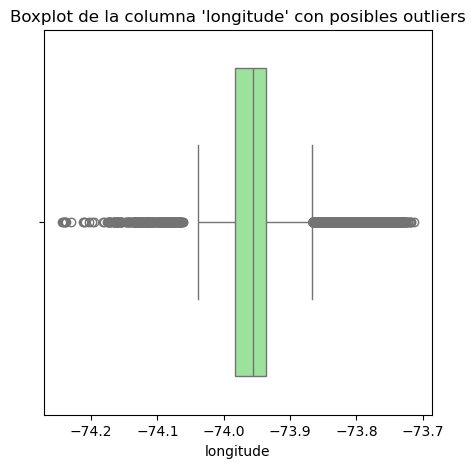

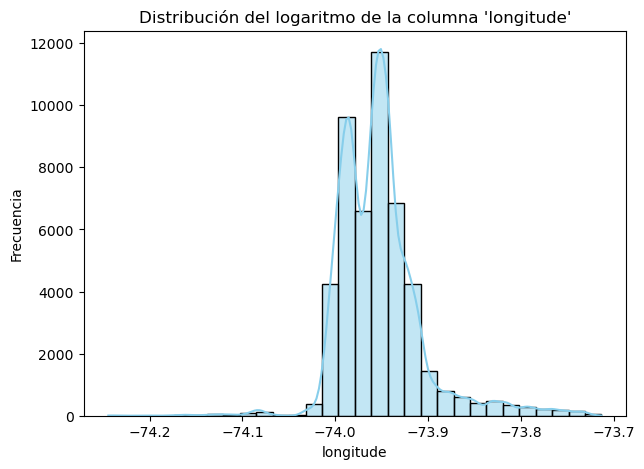

Número de outliers en la columna 'longitude)': 2833
         longitude
count  2833.000000
mean    -73.851849
std       0.105864
min     -74.244420
25%     -73.856070
50%     -73.828140
75%     -73.792180
max     -73.712990


In [144]:
# Boxplot con outliers para la columna 'longitude' aplicando logaritmo
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular los cuartiles y el IQR para la columna longitude'
Q1 = df_nuevo['longitude'].quantile(0.25)
Q3 = df_nuevo['longitude'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Seleccionar los outliers en la columna 
outliers_log_number_of_reviews = df_nuevo[(df_nuevo['longitude'] < limite_inferior) | (df_nuevo['longitude'] > limite_superior)]

# Contar y mostrar un resumen de los outliers detectados
num_outliers = len(outliers_log_number_of_reviews)
outliers_summary = outliers_log_number_of_reviews[['longitude']].describe()

# Visualizar los outliers con un boxplot para 'longitude'
plt.figure(figsize=(5,5))
sns.boxplot(x=df_nuevo['longitude'], color='lightgreen')
plt.title("Boxplot de la columna 'longitude' con posibles outliers")
plt.show()

# Visualizar la distribución de la columna 'longitude'
plt.figure(figsize=(7,5))
sns.histplot(df_nuevo['longitude'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del logaritmo de la columna 'longitude'")
plt.xlabel('longitude')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar el número de outliers y el resumen estadístico de 'longitude'
print(f"Número de outliers en la columna 'longitude)': {num_outliers}")
print(outliers_summary)


ELIMINANDO OUTLIERS

una vez que ya identificamos los outliers de cada columna, diseñamos una funcion para eliminar los outliers y correrla en cada columna para eliminar todos los outliers

In [146]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para eliminar outliers de una columna
def eliminar_outliers(df, columna):
    # Calcular los cuartiles y el IQR para la columna
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites para los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar los datos para eliminar los outliers
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    
    return df_filtrado

# Aplicación de la función a cada una de las columnas con outliers ya identificados

# Comenzamos con 'log_price'
df_nuevo = eliminar_outliers(df_nuevo, 'log_price')
print(f"Outliers eliminados de la columna 'log_price'")

# Luego pasamos a 'log_latitude'
df_nuevo = eliminar_outliers(df_nuevo, 'log_latitude')
print(f"Outliers eliminados de la columna 'log_latitude'")

# Ahora eliminamos outliers de 'availability_365'
df_nuevo = eliminar_outliers(df_nuevo, 'availability_365')
print(f"Outliers eliminados de la columna 'availability_365'")

# Continuamos con 'log_minimum_nights'
df_nuevo = eliminar_outliers(df_nuevo, 'log_minimum_nights')
print(f"Outliers eliminados de la columna 'log_minimum_nights'")

# Seguimos con 'log_reviews_per_month'
df_nuevo = eliminar_outliers(df_nuevo, 'log_reviews_per_month')
print(f"Outliers eliminados de la columna 'log_reviews_per_month'")

# Continuamos con 'log_number_of_reviews'
df_nuevo = eliminar_outliers(df_nuevo, 'log_number_of_reviews')
print(f"Outliers eliminados de la columna 'log_number_of_reviews'")

# Finalmente, eliminamos los outliers de 'longitude'
df_nuevo = eliminar_outliers(df_nuevo, 'longitude')
print(f"Outliers eliminados de la columna 'longitude'")

Outliers eliminados de la columna 'log_price'
Outliers eliminados de la columna 'log_latitude'
Outliers eliminados de la columna 'availability_365'
Outliers eliminados de la columna 'log_minimum_nights'
Outliers eliminados de la columna 'log_reviews_per_month'
Outliers eliminados de la columna 'log_number_of_reviews'
Outliers eliminados de la columna 'longitude'


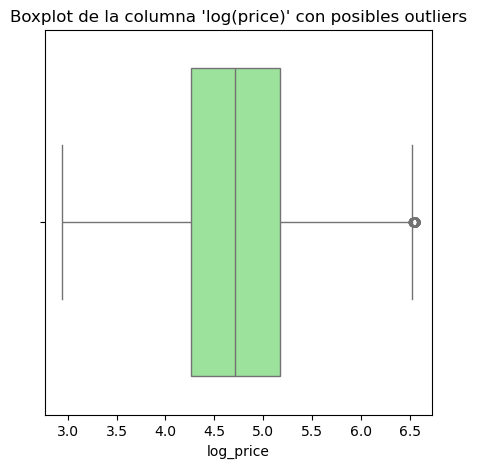

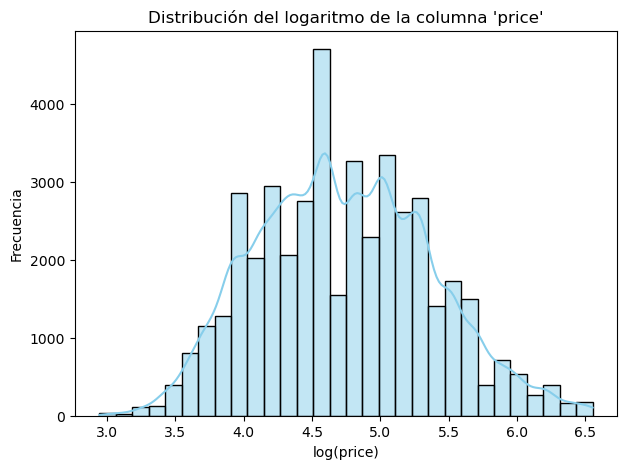

Número de outliers en la columna 'log(price)': 89
       log_price
count  89.000000
mean    6.550833
std     0.003586
min     6.536692
25%     6.551080
50%     6.552508
75%     6.552508
max     6.552508


In [148]:
#una vez eliminado los outliers, verificamos la distribución de algunas de las columnas y las comparamos con cómo estaba antes (con outliers)
#en este caso observamos la distribucion de price post eliminación de outliers

#boxplot con outliers  PRICE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la columna 'price'
columna = 'price'

# Transformar la columna 'price' usando el logaritmo natural
df_nuevo['log_price'] = np.log(df_nuevo[columna] + 1)  # Sumar 1 para evitar problemas con valores cero

# Calcular los cuartiles y el IQR para la columna transformada 'log_price'
Q1 = df_nuevo['log_price'].quantile(0.25)
Q3 = df_nuevo['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Seleccionar los outliers en la columna transformada
outliers_log_price = df_nuevo[(df_nuevo['log_price'] < limite_inferior) | (df_nuevo['log_price'] > limite_superior)]

# Contar y mostrar un resumen de los outliers detectados
num_outliers = len(outliers_log_price)
outliers_summary = outliers_log_price[['log_price']].describe()

# Visualizar los outliers con un boxplot para 'log_price'
plt.figure(figsize=(5,5))
sns.boxplot(x=df_nuevo['log_price'], color='lightgreen')
plt.title("Boxplot de la columna 'log(price)' con posibles outliers")
plt.show()

# Visualizar la distribución de la columna 'log_price'
plt.figure(figsize=(7,5))
sns.histplot(df_nuevo['log_price'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del logaritmo de la columna 'price'")
plt.xlabel('log(price)')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar el número de outliers y el resumen estadístico de 'log_price'
print(f"Número de outliers en la columna 'log(price)': {num_outliers}")
print(outliers_summary)

In [150]:
#####INCISO 5: Transformen las variables ‘neighbourhood_group’ y ‘room_type’ a variables numericas.
#tranformar variables neigbourhood type y room type a numericas 
#pasar de categoricas a numericas 

# Importar LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Transformar la columna 'neighbourhood_group'
df_nuevo['neighbourhood_group_encoded'] = label_encoder.fit_transform(df_nuevo['neighbourhood_group'])

# Transformar la columna 'room_type'
df_nuevo['room_type_encoded'] = label_encoder.fit_transform(df_nuevo['room_type'])

# Visualizar el resultado
print(df_nuevo[['neighbourhood_group', 'neighbourhood_group_encoded', 'room_type', 'room_type_encoded']].head())

df_nuevo.head
print('neighbourhood_group_encoded', df_nuevo.dtypes)

  neighbourhood_group  neighbourhood_group_encoded        room_type  \
0            Brooklyn                            1     Private room   
1           Manhattan                            2  Entire home/apt   
2           Manhattan                            2     Private room   
3            Brooklyn                            1  Entire home/apt   
4           Manhattan                            2  Entire home/apt   

   room_type_encoded  
0                  1  
1                  0  
2                  1  
3                  0  
4                  0  
neighbourhood_group_encoded id                                  int64
name                               object
host_id                             int64
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews            

In [152]:
#verificamos que se haya cambiado correctamente a dato numerico 
print('room_type_encoded', df_nuevo.dtypes)

room_type_encoded id                                  int64
name                               object
host_id                             int64
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
log_price                         float64
log_latitude                      float64
log_minimum_nights                float64
log_reviews_per_month             float64
log_number_of_reviews             float64
neighbourhood_group_encoded         int64
room_type_encoded                   int64
dtype: object


In [154]:
#verificamos que se haya cambiado correctamente a dato numerico 
print('neighbourhood_group_encoded', df_nuevo.dtypes)

neighbourhood_group_encoded id                                  int64
name                               object
host_id                             int64
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
log_price                         float64
log_latitude                      float64
log_minimum_nights                float64
log_reviews_per_month             float64
log_number_of_reviews             float64
neighbourhood_group_encoded         int64
room_type_encoded                   int64
dtype: object


In [156]:
#ahora borramos columna que tiene los nomrbes y renombramos la de encoded

# Eliminar las columnas originales 'neighbourhood_group' y 'room_type'
df_nuevo.drop(columns=['neighbourhood_group', 'room_type'], inplace=True)

# Renombrar las columnas codificadas a los nombres originales
df_nuevo.rename(columns={'neighbourhood_group_encoded': 'neighbourhood_group', 'room_type_encoded': 'room_type'}, inplace=True)

# Visualizar el resultado
print(df_nuevo.head())

df_nuevo

     id                                              name  host_id  latitude  \
0  2539                Clean & quiet apt home by the park     2787  40.64749   
1  2595                             Skylit Midtown Castle     2845  40.75362   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632  40.80902   
3  3831                   Cozy Entire Floor of Brownstone     4869  40.68514   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192  40.79851   

   longitude  price  minimum_nights  number_of_reviews  reviews_per_month  \
0  -73.97237  149.0               1                  9               0.21   
1  -73.98377  225.0               1                 45               0.38   
2  -73.94190  150.0               3                  0               0.00   
3  -73.95976   89.0               1                270               4.64   
4  -73.94399   80.0              10                  9               0.10   

   calculated_host_listings_count  availability_365  log

,id,name,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,log_latitude,log_minimum_nights,log_reviews_per_month,log_number_of_reviews,neighbourhood_group,room_type
0,2539,Clean & quiet apt home by the park,2787,40.64749,-73.97237,149.0,1,9,0.21,6,365,5.010635,3.729241,0.693147,0.190620,2.302585,1,1
1,2595,Skylit Midtown Castle,2845,40.75362,-73.98377,225.0,1,45,0.38,2,355,5.420535,3.731786,0.693147,0.322083,3.828641,2,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,40.80902,-73.94190,150.0,3,0,0.00,1,365,5.017280,3.733112,1.386294,0.000000,0.000000,2,1
3,3831,Cozy Entire Floor of Brownstone,4869,40.68514,-73.95976,89.0,1,270,4.64,1,194,4.499810,3.730145,0.693147,1.729884,5.602119,1,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,40.79851,-73.94399,80.0,10,9,0.10,1,0,4.394449,3.732861,2.397895,0.095310,2.302585,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,40.67853,-73.94995,70.0,2,0,0.00,2,9,4.262680,3.729986,1.098612,0.000000,0.000000,1,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,40.70184,-73.93317,40.0,4,0,0.00,2,36,3.713572,3.730545,1.609438,0.000000,0.000000,1,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,40.81475,-73.94867,115.0,10,0,0.00,1,27,4.753590,3.733249,2.397895,0.000000,0.000000,2,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,40.75751,-73.99112,55.0,1,0,0.00,6,2,4.025352,3.731879,0.693147,0.000000,0.000000,2,2


In [158]:
####INCISO 6:
#Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. 
#Llamen a esa nueva columna <code>offer group</code>

# Contar la cantidad de oferentes únicos por 'neighbourhood_group' usando groupby y count() sobre 'host_id'
offer_count = df_nuevo.groupby('neighbourhood_group')['host_id'].count().reset_index(name='offer_group')

# Hacer un merge para añadir la nueva columna 'offer_group' al dataframe original
df_nuevo = df_nuevo.merge(offer_count, on='neighbourhood_group', how='left')

# Visualizar las primeras filas del dataframe con la nueva columna
print(df_nuevo.head())

     id                                              name  host_id  latitude  \
0  2539                Clean & quiet apt home by the park     2787  40.64749   
1  2595                             Skylit Midtown Castle     2845  40.75362   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632  40.80902   
3  3831                   Cozy Entire Floor of Brownstone     4869  40.68514   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192  40.79851   

   longitude  price  minimum_nights  number_of_reviews  reviews_per_month  \
0  -73.97237  149.0               1                  9               0.21   
1  -73.98377  225.0               1                 45               0.38   
2  -73.94190  150.0               3                  0               0.00   
3  -73.95976   89.0               1                270               4.64   
4  -73.94399   80.0              10                  9               0.10   

   calculated_host_listings_count  availability_365  log

In [160]:
df_nuevo[['offer_group', 'neighbourhood_group']]

,offer_group,neighbourhood_group
0,19589,1
1,20766,2
2,20766,2
3,19589,1
4,20766,2
...,...,...
44422,19589,1
44423,19589,1
44424,20766,2
44425,20766,2


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

Text(0.5, 1.0, 'Correlation matrix')

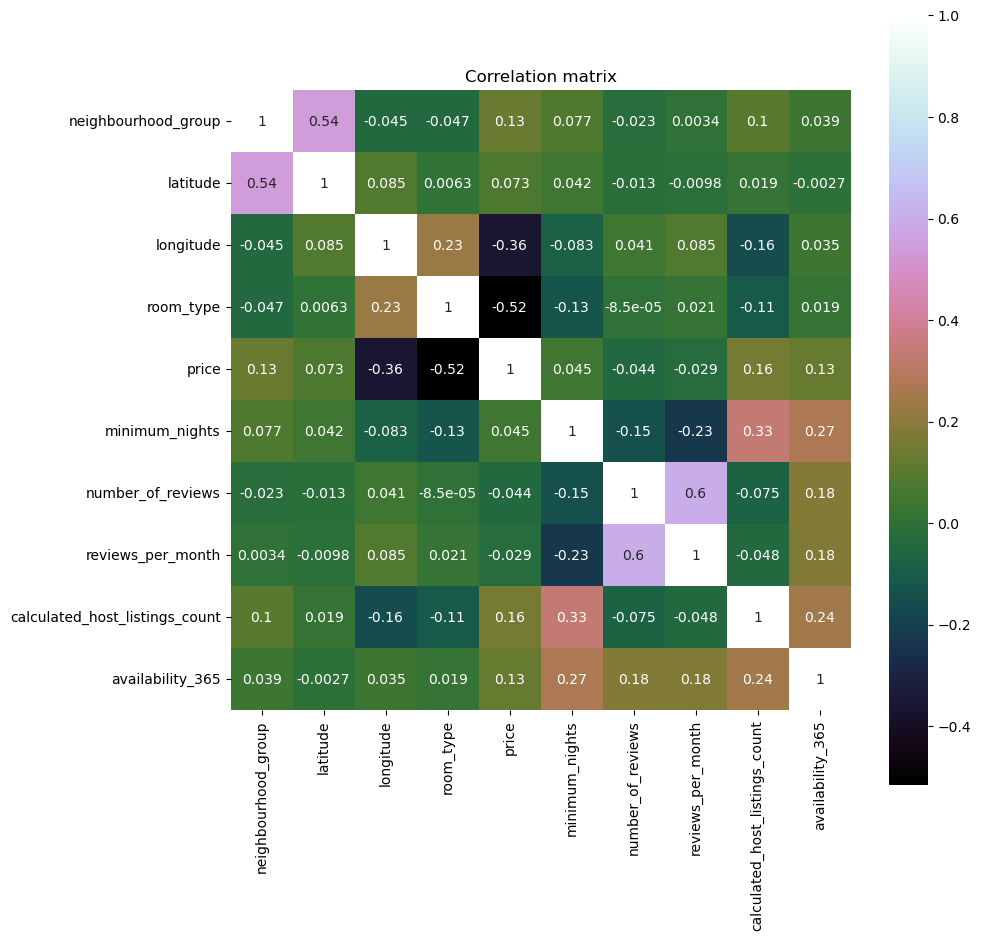

In [162]:
# Resolver acá

#seleccionamos las varibles de interés para hacer la matriz de correlación
variables = df_nuevo[["neighbourhood_group", "latitude", "longitude", "room_type" , "price" , "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"  ]]
#planteamos la matriz de correlación
correlation = variables.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix') #nos permite ver los grados de las correlaciones a través de distintos colores

plt.title('Correlation matrix')

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

Proporción por Neighbourhood Group:
neighbourhood_group
2    0.467418
1    0.440926
3    0.078353
0    0.013303
Name: proportion, dtype: float64

Proporción por Room Type:
room_type
0    0.522430
1    0.454904
2    0.022666
Name: proportion, dtype: float64


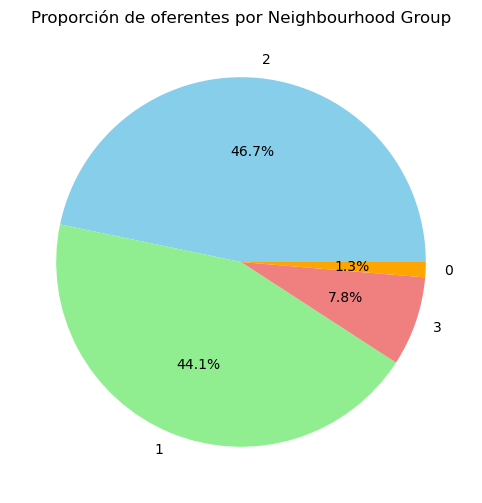

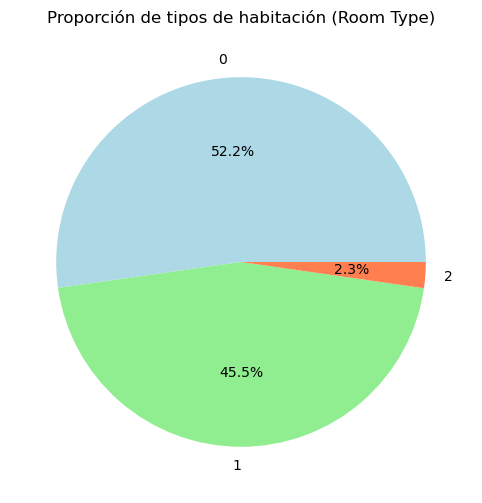

In [164]:
# Resolver acá

# calculamos de la proporción de oferentes por 'neighbourhood_group' y 'room_type'
proporcion_neighbourhood = df_nuevo['neighbourhood_group'].value_counts(normalize=True)
proporcion_room_type = df_nuevo['room_type'].value_counts(normalize=True)

# mostramos las proporciones calculadas
print("Proporción por Neighbourhood Group:")
print(proporcion_neighbourhood)
print("\nProporción por Room Type:")
print(proporcion_room_type)

# hacemos un pie chart para 'neighbourhood_group'
plt.figure(figsize=(8,6))
proporcion_neighbourhood.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'yellow']) #mostrar los distintos porcentajes en distintos colores
plt.title('Proporción de oferentes por Neighbourhood Group')
plt.ylabel('')  # Ocultar etiqueta del eje Y
plt.show()

# hacemos un pie chart para 'room_type'
plt.figure(figsize=(8,6))
proporcion_room_type.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'coral'])
plt.title('Proporción de tipos de habitación (Room Type)')
plt.ylabel('')  # Ocultar etiqueta del eje Y
plt.show()

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

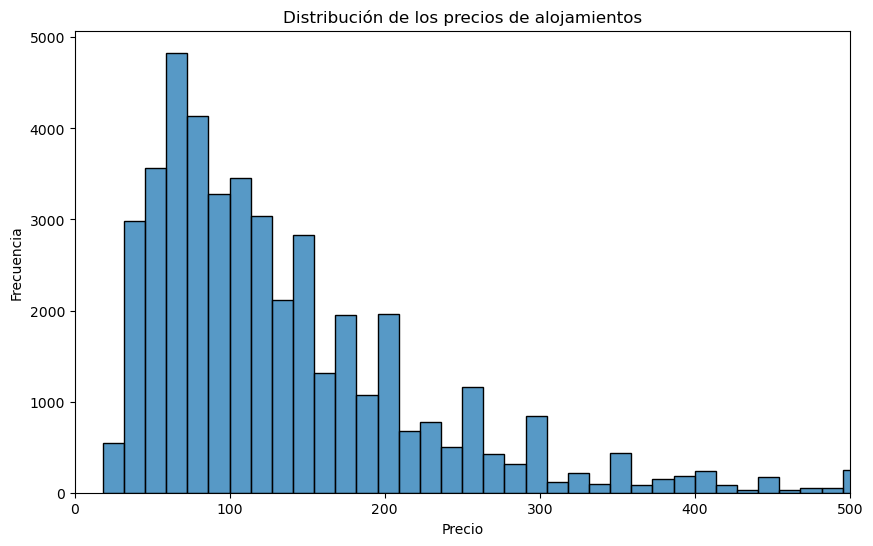

In [166]:
# Resolver acá
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#distribución de los precios 

# creamos un histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(df_nuevo['price'], bins=50, kde=False)
plt.title('Distribución de los precios de alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xlim(0, df_nuevo['price'].quantile(0.99))  # Limitar a un percentil alto para evitar outliers extremos
plt.show()

In [168]:
# calculamos precio mínimo, máximo y promedio
precio_minimo = df_nuevo['price'].min()
precio_maximo = df_nuevo['price'].max()
precio_promedio = df_nuevo['price'].mean()

# resultados
print(f'Precio mínimo: ${precio_minimo}')
print(f'Precio máximo: ${precio_maximo}')
print(f'Precio promedio: ${precio_promedio:.2f}') # 2 cifras decimales.



Precio mínimo: $18.0
Precio máximo: $700.0
Precio promedio: $139.10


In [170]:
# Media de precio por "Neighbourhood group"
media_precio_neighbourhood = df_nuevo.groupby('neighbourhood_group')['price'].mean()

# resultados
print(media_precio_neighbourhood)

# Media de precio por tipo de habitación
media_precio_room_type = df_nuevo.groupby('room_type')['price'].mean()

# resultados
print(media_precio_room_type) 

neighbourhood_group
0     77.329949
1    115.450661
2    170.638159
3     94.567653
Name: price, dtype: float64
room_type
0    189.831667
1     84.488966
2     65.950348
Name: price, dtype: float64


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

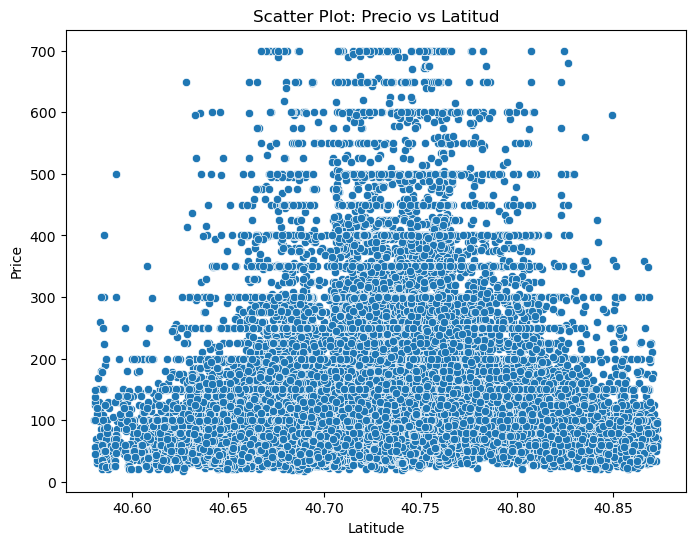

In [172]:
# Resolver acá

#ver la la relación entre dos variables de interés: precio y latitud
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.scatterplot(x='latitude', y='price', data=df_nuevo)
plt.title('Scatter Plot: Precio vs Latitud')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()

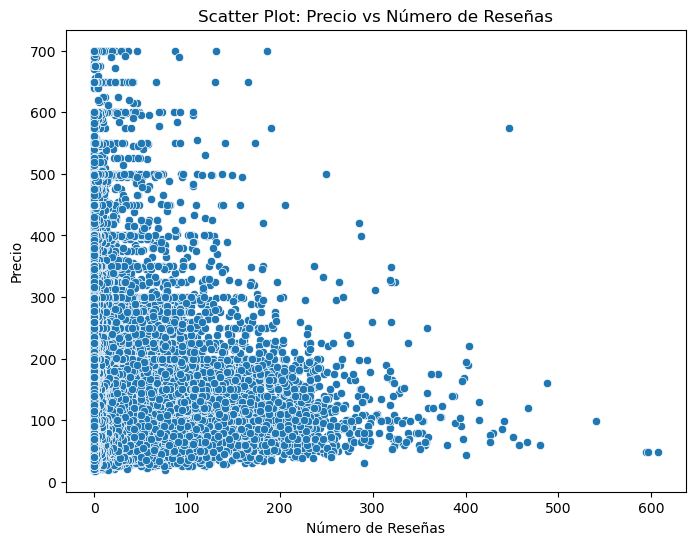

In [176]:
#ver la la relación entre dos variables de interés: precio y número de reseñas
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.scatterplot(x='number_of_reviews', y='price', data=df_nuevo)
plt.title('Scatter Plot: Precio vs Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio')
plt.show()

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

/var/folders/6r/nbyhqmrx001_n7yxc4_k84y00000gn/T/ipykernel_23516/4214245457.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(X.columns))  # Definir un colormap


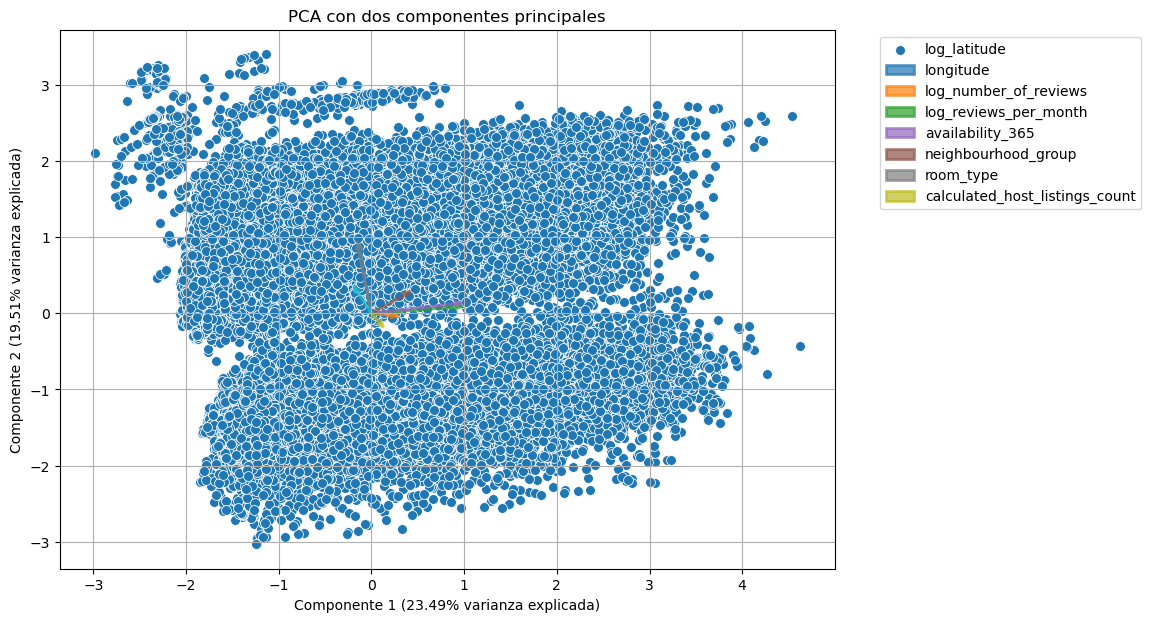

Porcentaje de varianza explicada por el primer componente: 23.49%
Porcentaje de varianza explicada por el segundo componente: 19.51%
Varianza total explicada por los dos primeros componentes: 43.00%
Loadings de las variables en los componentes principales:
                                     PC1       PC2
log_latitude                   -0.086567  0.648760
longitude                       0.159623 -0.022989
log_number_of_reviews           0.659271  0.066067
log_reviews_per_month           0.660343  0.101193
availability_365                0.262624  0.197235
neighbourhood_group            -0.103538  0.680622
room_type                       0.063434 -0.097110
calculated_host_listings_count -0.112342  0.228909


In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns



# excluimos las columnas no numéricas y seleccionamos solo las variables relevantes para el analisis de componentes principales
df_numeric = df_nuevo.select_dtypes(include=[float, int])
X = df_numeric[['log_latitude', 'longitude', 'log_number_of_reviews', 'log_reviews_per_month', 'availability_365', 'neighbourhood_group', 'room_type', 'calculated_host_listings_count']]

# primero normalizamos de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# segundo aplicamos PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# tercero graficamos los resultados del PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=50)

# añadimos títulos y etiquetas
plt.title('PCA con dos componentes principales')
plt.xlabel(f'Componente 1 ({pca.explained_variance_ratio_[0]:.2%} varianza explicada)')
plt.ylabel(f'Componente 2 ({pca.explained_variance_ratio_[1]:.2%} varianza explicada)')
plt.grid(True)

# Añadimos las líneas de los loadings (direcciones de las variables originales)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
colors = plt.cm.get_cmap('tab10', len(X.columns))  # Definir un colormap

for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              color=colors(i), alpha=0.7, lw=2, head_width=0.05)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, '', color=colors(i), ha='center', va='center')

# Añadimos la leyenda
plt.legend(X.columns, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Mostramos  el porcentaje de varianza explicada por cada componente
print(f"Porcentaje de varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Porcentaje de varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Varianza total explicada por los dos primeros componentes: {sum(pca.explained_variance_ratio_):.2%}")

# Visualización de los loadings (cómo las variables influyen en los componentes principales)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print("Loadings de las variables en los componentes principales:")
print(loadings)


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [95]:
# Resolver acá
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Eliminamos las columnas no numéricas y seleccionamos solo las variables relevantes
df_numeric = df_nuevo.select_dtypes(include=[float, int])

# Definimos la variable dependiente (y) y las variables independientes (X)
 # Matriz de variables independientes sin la columna 'price'
X = df_numeric[['log_latitude', 'longitude', 'log_number_of_reviews', 'log_reviews_per_month', 'availability_365', 'neighbourhood_group', 'room_type', 'calculated_host_listings_count']]
y = df_numeric['price']  # Vector de la variable dependiente 'price'

# Agregamos una columna de unos (1) para el término independiente
X = np.c_[np.ones(X.shape[0]), X]  # Agregamos la columna de unos al inicio de la matriz X

# Partimos la base en entrenamiento y prueba (70% train, 30% test) con random_state=201
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

Tamaño del conjunto de entrenamiento (X_train): (31098, 9)
Tamaño del conjunto de prueba (X_test): (13329, 9)
Tamaño del conjunto de entrenamiento (y_train): (31098,)
Tamaño del conjunto de prueba (y_test): (13329,)


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [187]:
# Resolver acá
# Importar las librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Eliminamos las columnas no numéricas y seleccionamos solo las variables relevantes
df_numeric = df_nuevo.select_dtypes(include=[float, int])

# Definimos la variable dependiente (y) y las variables independientes (X)
X = df_numeric[['log_latitude', 'longitude', 'log_number_of_reviews', 'log_reviews_per_month', 'availability_365', 'neighbourhood_group', 'room_type', 'calculated_host_listings_count']]
y = df_numeric['price']

# Agregamos una columna de unos (1) para el término independiente
X = np.c_[np.ones(X.shape[0]), X]  # Agregamos la columna de unos al inicio de la matriz X

# Partimos la base en entrenamiento y prueba (70% train, 30% test) con random_state=201
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Estimamos el modelo usando el conjunto de entrenamiento
model = LinearRegression().fit(X_train, y_train)

# Calculamos el R2 en el conjunto de entrenamiento
#no sirve para medir performance el R2
r2_test = model.score(X_test, y_test)  # R2 del conjunto de entrenamiento
#R2 se calcula con los de entrenamiento y a nosotros nos importa la muestra de testeo 
#no sirve para evaluar performance del modelo

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos la ECM (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE) en la muestra de testeo: {mse}')
#lo usamos para evaluar performance del modelo en la muestra de testeo

# El intercepto b0
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente b1
pendiente = model.coef_
print('\nPendiente:', pendiente)

Error Cuadrático Medio (MSE) en el conjunto de testeo: 6497.523723327915

Intercepto: -86008.74607104807

Pendiente: [ 0.00000000e+00  5.80111284e+03 -8.72523714e+02 -8.46233242e+00
  1.30858056e+01  1.11045495e-01  7.40082429e+00 -8.45704634e+01
  1.64346508e-02]
